In [3]:
import torch
import torch.nn.functional as F

In [4]:
image = torch.rand(6,6)
print("image=", image)
#Add a new dimension along 0th dimension
#i.e. (6,6) becomes (1,6,6). This is because
#pytorch expects the input to conv2D as 4d tensor
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
print("image=", image)
kernel = torch.ones(3,3)
#kernel = torch.rand(3,3)
print("kernel=", kernel)
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)
#Perform the convolution
for i in range(1,6):
    outimage = F.conv2d(image, kernel, stride=i, padding=0)
    print(f"outimage for stride = {i} is {outimage}")

image= tensor([[0.3223, 0.8792, 0.1208, 0.6081, 0.5566, 0.4057],
        [0.3450, 0.3374, 0.8744, 0.1475, 0.1315, 0.9973],
        [0.8757, 0.3656, 0.0417, 0.1020, 0.1129, 0.2251],
        [0.8718, 0.6479, 0.8521, 0.5356, 0.2859, 0.3343],
        [0.4460, 0.1770, 0.1104, 0.5017, 0.9113, 0.1937],
        [0.5409, 0.5617, 0.4320, 0.2526, 0.3468, 0.3669]])
image.shape= torch.Size([1, 6, 6])
image.shape= torch.Size([1, 1, 6, 6])
image= tensor([[[[0.3223, 0.8792, 0.1208, 0.6081, 0.5566, 0.4057],
          [0.3450, 0.3374, 0.8744, 0.1475, 0.1315, 0.9973],
          [0.8757, 0.3656, 0.0417, 0.1020, 0.1129, 0.2251],
          [0.8718, 0.6479, 0.8521, 0.5356, 0.2859, 0.3343],
          [0.4460, 0.1770, 0.1104, 0.5017, 0.9113, 0.1937],
          [0.5409, 0.5617, 0.4320, 0.2526, 0.3468, 0.3669]]]])
kernel= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
outimage for stride = 1 is tensor([[[[4.1621, 3.4767, 2.6955, 3.2866],
          [5.2116, 3.9042, 3.0835, 2.8719],
          [

In [5]:
for i in range(1,6):
    for j in range(6):
        padding_tuple = (i,j)
        outimage = F.conv2d(image, kernel, stride=i, padding=padding_tuple)
        print(f"outimage for stride = {i} and padding = {padding_tuple} is {outimage} and dimension is {outimage.shape}")

outimage for stride = 1 and padding = (1, 0) is tensor([[[[2.8791, 2.9674, 2.4390, 2.8466],
          [4.1621, 3.4767, 2.6955, 3.2866],
          [5.2116, 3.9042, 3.0835, 2.8719],
          [4.3883, 3.3340, 3.4535, 3.2023],
          [4.6400, 4.0710, 4.2283, 3.7286],
          [2.2681, 2.0354, 2.5547, 2.5729]]]]) and dimension is torch.Size([1, 1, 6, 4])
outimage for stride = 1 and padding = (1, 1) is tensor([[[[1.8839, 2.8791, 2.9674, 2.4390, 2.8466, 2.0911],
          [3.1251, 4.1621, 3.4767, 2.6955, 3.2866, 2.4290],
          [3.4434, 5.2116, 3.9042, 3.0835, 2.8719, 2.0869],
          [3.3840, 4.3883, 3.3340, 3.4535, 3.2023, 2.0631],
          [3.2455, 4.6400, 4.0710, 4.2283, 3.7286, 2.4388],
          [1.7257, 2.2681, 2.0354, 2.5547, 2.5729, 1.8186]]]]) and dimension is torch.Size([1, 1, 6, 6])
outimage for stride = 1 and padding = (1, 2) is tensor([[[[0.6673, 1.8839, 2.8791, 2.9674, 2.4390, 2.8466, 2.0911, 1.4029],
          [1.5429, 3.1251, 4.1621, 3.4767, 2.6955, 3.2866, 2.4290,

In [6]:
#validation of formula
def validate(h_in, w_in, padding_val, dilation, kernel_size, stride_val):
    h_out = (h_in + 2*padding_val - (dilation*kernel_size - 1) - 1)//stride_val + 1
    w_out = (w_in + 2*padding_val - (dilation*kernel_size - 1) - 1)//stride_val + 1
    return h_out, w_out

In [7]:
validate(6,6,1,1,3,1)

(6, 6)

Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3 and observe the
output. Implement the equivalent of torch.nn.Conv2d using the torch.nn.functional.conv2D
to get the same output. You may ignore bias.

In [11]:
import torch.nn as nn
image = torch.rand(1,3,6,6)
kernel = torch.ones(1,3,3,3)

outimage_F = F.conv2d(image, kernel, padding=0, bias=None)
print(outimage_F)
conv = nn.Conv2d(1,3,kernel_size = 3, padding=0, bias=False)
conv.weight = nn.Parameter(kernel)
outimage_nn = conv(image)
print(outimage_nn)

tensor([[[[12.5043, 12.1973, 13.0683, 13.8536],
          [12.8254, 12.2091, 12.1656, 11.2655],
          [12.4004, 12.5102, 12.3087, 11.8467],
          [13.4151, 14.3527, 13.8556, 12.6800]]]])
tensor([[[[12.5043, 12.1973, 13.0683, 13.8536],
          [12.8254, 12.2091, 12.1656, 11.2655],
          [12.4004, 12.5102, 12.3087, 11.8467],
          [13.4151, 14.3527, 13.8556, 12.6800]]]],
       grad_fn=<ConvolutionBackward0>)


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model architecture using Sequential
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(64 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)



In [11]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

# Instantiate the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




In [12]:
# Train the model
num_epochs = 3  # Adjusted to 3 epochs
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')


[1,   100] loss: 0.580
[1,   200] loss: 0.137
[1,   300] loss: 0.096
[1,   400] loss: 0.085
[2,   100] loss: 0.061
[2,   200] loss: 0.052
[2,   300] loss: 0.049
[2,   400] loss: 0.051
[3,   100] loss: 0.035
[3,   200] loss: 0.036
[3,   300] loss: 0.037
[3,   400] loss: 0.032
Finished Training


Classification Accuracy: 0.99


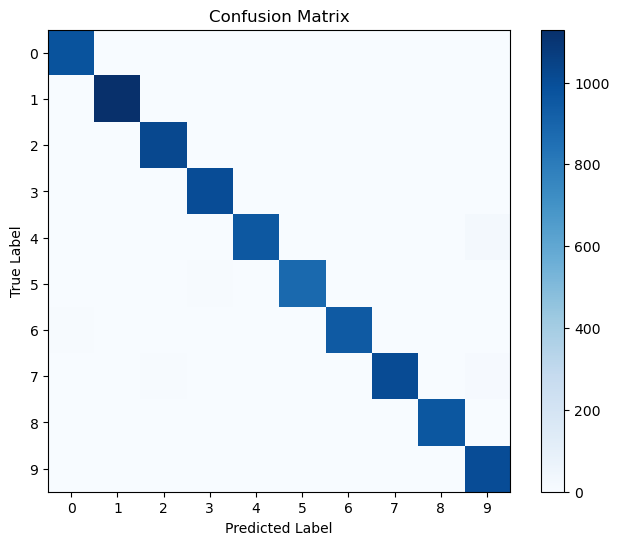

Number of learnable parameters: 421642


In [13]:
# Make predictions on the test set
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Calculate classification accuracy
accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
print('Classification Accuracy: %.2f' % accuracy)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Number of learnable parameters in the model
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of learnable parameters:', num_params)


[1,   100] loss: 0.921
[1,   200] loss: 0.262
[1,   300] loss: 0.171
[1,   400] loss: 0.128
[2,   100] loss: 0.102
[2,   200] loss: 0.088
[2,   300] loss: 0.079
[2,   400] loss: 0.075
[3,   100] loss: 0.065
[3,   200] loss: 0.059
[3,   300] loss: 0.056
[3,   400] loss: 0.055
Finished Training
Classification Accuracy: 0.98


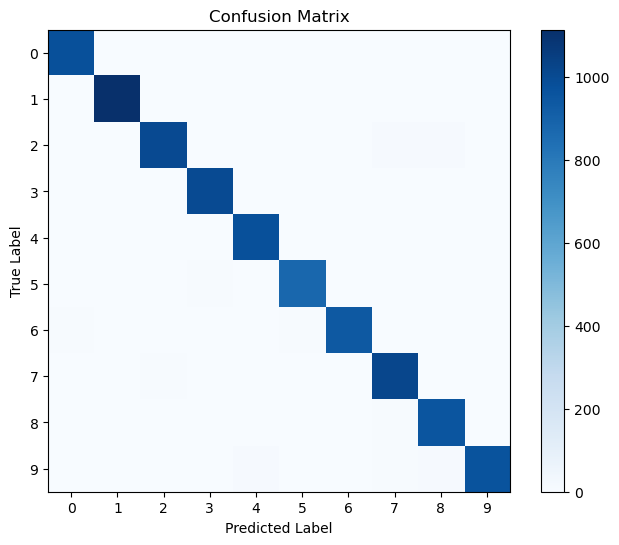

Number of learnable parameters: 105866
Number of learnable parameters in reduced model: 26698


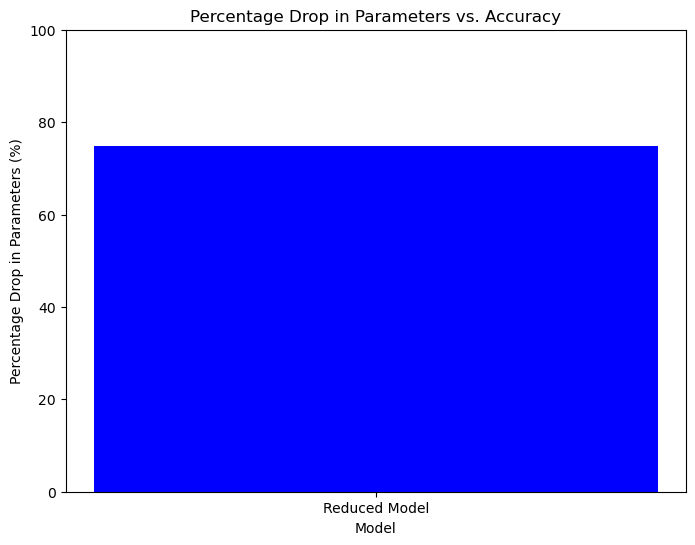

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model architecture using Sequential
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

# Instantiate the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 3
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

# Make predictions on the test set
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Calculate classification accuracy
accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
print('Classification Accuracy: %.2f' % accuracy)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Number of learnable parameters in the model
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of learnable parameters:', num_params)

# Model with reduced parameters
reduced_model = nn.Sequential(
    nn.Conv2d(1, 8, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(8, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(16 * 7 * 7, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

# Calculate number of learnable parameters in the reduced model
num_params_reduced = sum(p.numel() for p in reduced_model.parameters() if p.requires_grad)
print('Number of learnable parameters in reduced model:', num_params_reduced)

# Plot percentage drop in parameters vs. accuracy
percentage_drop = ((num_params - num_params_reduced) / num_params) * 100
plt.figure(figsize=(8, 6))
plt.bar(['Reduced Model'], [percentage_drop], color='b')
plt.xlabel('Model')
plt.ylabel('Percentage Drop in Parameters (%)')
plt.title('Percentage Drop in Parameters vs. Accuracy')
plt.ylim(0, 100)
plt.show()
